# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [ ]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))
sonrot2 = np.array(Image.open('img/sonrot2.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [ ]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+fftshift(np.abs(If)))

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

In [ ]:
import matplotlib.pyplot as plt

def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where(I < s, 0, 255)

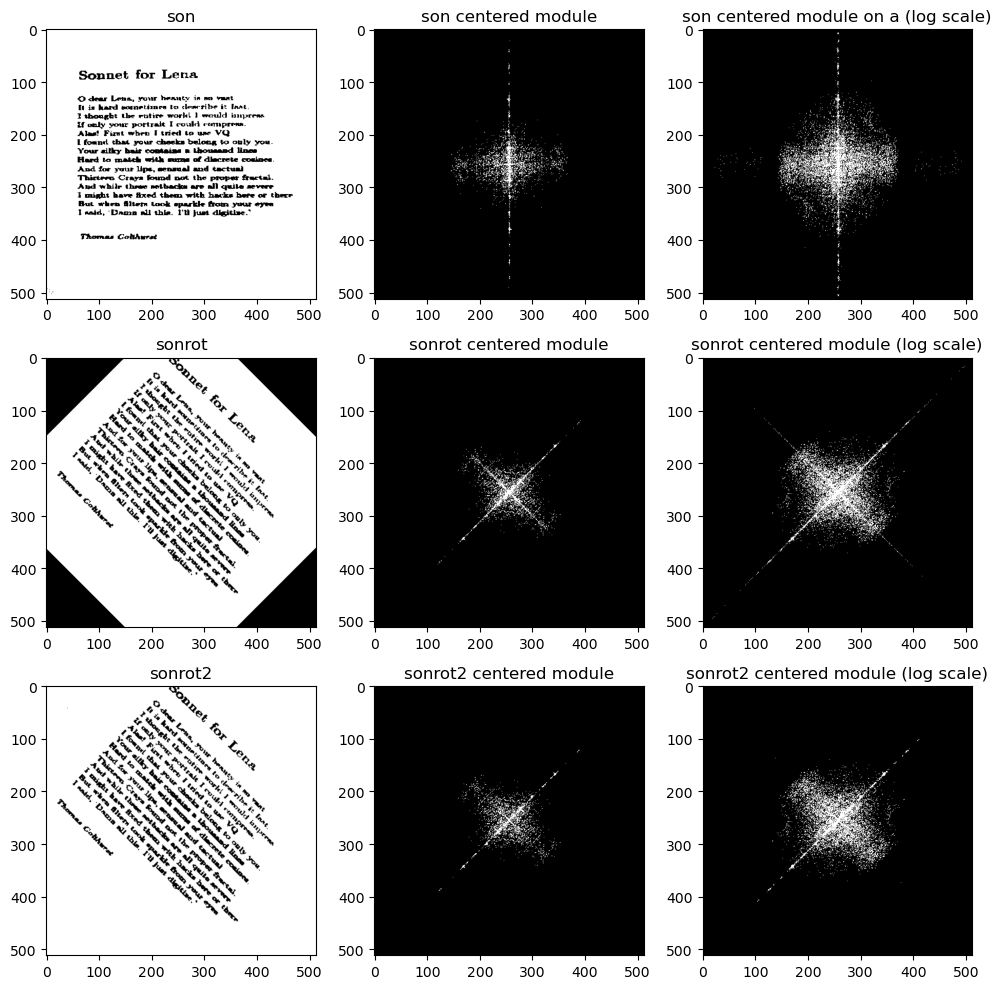

In [ ]:
# ---- parameters
threshold = 1e5
# ---- computation
sonFT = computeFT(son) # Fourier transform of son
sonModule = toVisualizeFT(sonFT) # centered module of son's Fourier transform
sonModuleLog = toVisualizeLogFT(sonFT) # centered module of son's Fourier transform (log scale)
# ----
sonrotFT = computeFT(sonrot) # Fourier transform of sonrot
sonrotModule = toVisualizeFT(sonrotFT) # centered module of sonrot's Fourier transform
sonrotModuleLog = toVisualizeLogFT(sonrotFT) # centered module of sonrot's Fourier transform (log scale)
# ---- 
sonrot2FT = computeFT(sonrot2) # Fourier transform of sonrot2
sonrot2Module = toVisualizeFT(sonrot2FT) # centered module of sonrot2's Fourier transform
sonrot2ModuleLog = toVisualizeLogFT(sonrot2FT) # centered module of sonrot2's Fourier transform (log scale)
# ---- plotting
plt.subplots(figsize=(10,10))
# ---- son plots
plt.subplot(3,3,1)
plt.imshow(son, cmap="gray")
plt.title("son")
plt.subplot(3,3,2)
plt.imshow(thresholdImage(sonModule, threshold), cmap="gray")
plt.title("son centered module")
plt.subplot(3,3,3)
plt.imshow(thresholdImage(sonModuleLog, 11), cmap="gray")
plt.title("son centered module on a (log scale)")
# ---- sonrot plots
plt.subplot(3,3,4)
plt.imshow(sonrot, cmap="gray")
plt.title("sonrot")
plt.subplot(3,3,5)
plt.imshow(thresholdImage(sonrotModule, threshold), cmap="gray")
plt.title("sonrot centered module")
plt.subplot(3,3,6)
plt.imshow(thresholdImage(sonrotModuleLog, 11), cmap="gray")
plt.title("sonrot centered module (log scale)")
# ---- sonrot2 plots
plt.subplot(3,3,7)
plt.imshow(sonrot2, cmap="gray")
plt.title("sonrot2")
plt.subplot(3,3,8)
plt.imshow(thresholdImage(sonrot2Module, threshold), cmap="gray")
plt.title("sonrot2 centered module")
plt.subplot(3,3,9)
plt.imshow(thresholdImage(sonrot2ModuleLog, 11), cmap="gray")
plt.title("sonrot2 centered module (log scale)")
# ----
plt.tight_layout()
plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

We can divide the result of the centered module in two parts:
- a "long line" along the y-axis, representing the evenly placed lines of our image.
- a "scatter plot" amidst the center of our results, representing each letters of our image.

On `sonrot`, we have another "long line" appearing along the x-axis (*rotated by* +45° *degrees*), representing the loss of information when we initially rotated the image. Factually, it represents the missing pixels that have been replaced by dark pixels after the rotation, which are the black triangles in each of the corners of the image. It might act as noise, as it doesn't represent meaningful information of the rotated image.

On `sonrot2`, where we replaced the loss of information by white pixels, this line don't appear, and is just the result of the initial image, rotated by $\theta = +45°$.

There are no particular differences between a linear and logarithmitic scale, except points are more spaced out between each others on the logarithmitic scale, and that we have to select a much smaller threshold (we chosed $t=11$, by experimenting).

So, with our results, we can observe the "rotation specifity" of the Fourier transform, *i.e* that when we perform a rotation of angle $\theta$ in the spatial domain, it induces the same rotation in the frequency domain.


4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [ ]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1 + (1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

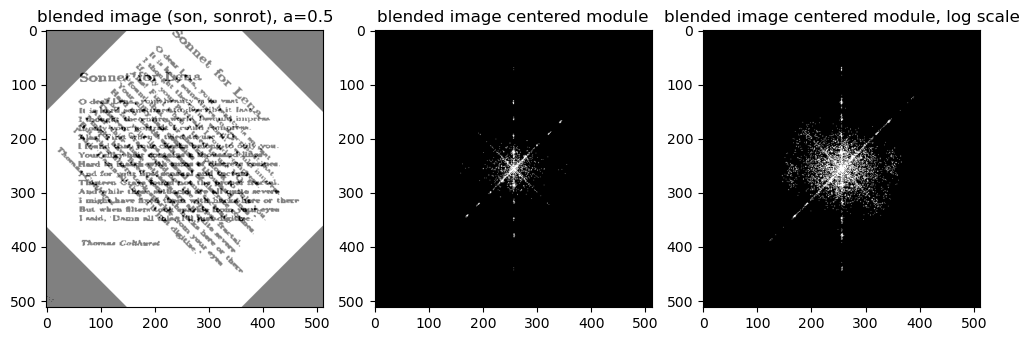

In [ ]:
# ---- parameters
alpha = 0.5
# ---- computation
blendedImage = blend(son, sonrot, alpha)
blendedImageFT = computeFT(blendedImage)
blendedImageModule = toVisualizeFT(blendedImageFT)
blendedImageModuleLog = toVisualizeLogFT(blendedImageFT)
# ---- plotting
plt.subplots(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(blendedImage, cmap="gray")
plt.title("blended image (son, sonrot), a=0.5")
plt.subplot(1,3,2)
plt.imshow(thresholdImage(blendedImageModule, 1e5), cmap="gray")
plt.title("blended image centered module")
plt.subplot(1,3,3)
plt.imshow(thresholdImage(blendedImageModuleLog, 11), cmap="gray")
plt.title("blended image centered module, log scale")
# ----
plt.tight_layout()
plt.show()

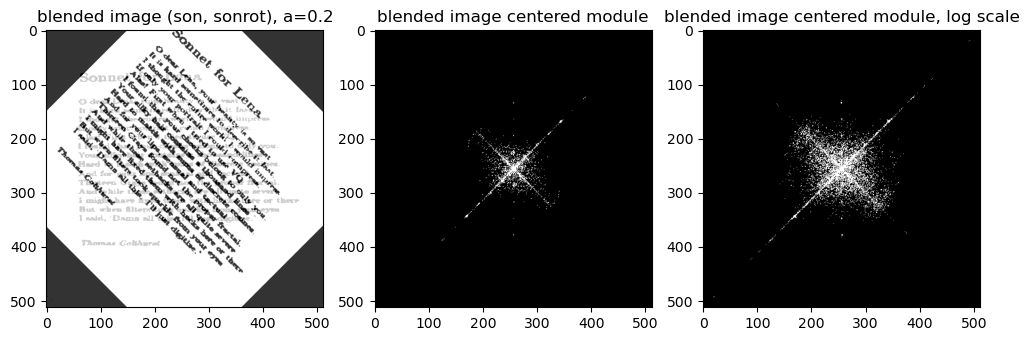

In [ ]:
# ---- parameters
alpha = 0.2
# ---- computation
blendedImage = blend(son, sonrot, alpha)
blendedImageFT = computeFT(blendedImage)
blendedImageModule = toVisualizeFT(blendedImageFT)
blendedImageModuleLog = toVisualizeLogFT(blendedImageFT)
# ---- plotting
plt.subplots(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(blendedImage, cmap="gray")
plt.title("blended image (son, sonrot), a=0.2")
plt.subplot(1,3,2)
plt.imshow(thresholdImage(blendedImageModule, 1e5), cmap="gray")
plt.title("blended image centered module")
plt.subplot(1,3,3)
plt.imshow(thresholdImage(blendedImageModuleLog, 11), cmap="gray")
plt.title("blended image centered module, log scale")
# ----
plt.tight_layout()
plt.show()

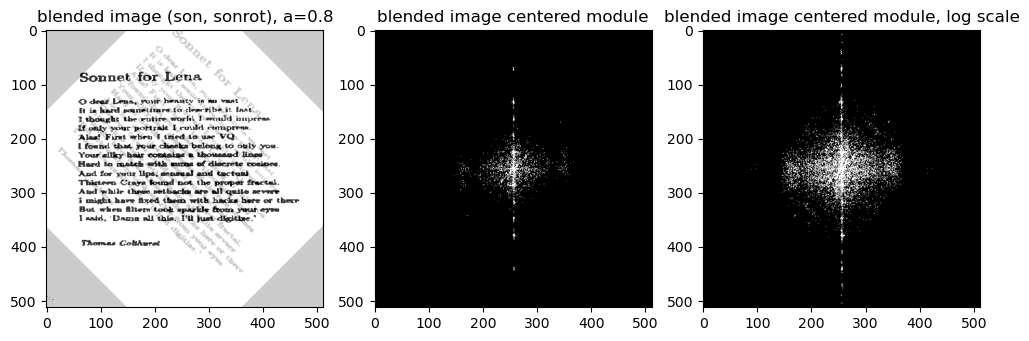

In [ ]:
# ---- parameters
alpha = 0.8
# ---- computation
blendedImage = blend(son, sonrot, alpha)
blendedImageFT = computeFT(blendedImage)
blendedImageModule = toVisualizeFT(blendedImageFT)
blendedImageModuleLog = toVisualizeLogFT(blendedImageFT)
# ---- plotting
plt.subplots(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(blendedImage, cmap="gray")
plt.title("blended image (son, sonrot), a=0.8")
plt.subplot(1,3,2)
plt.imshow(thresholdImage(blendedImageModule, 1e5), cmap="gray")
plt.title("blended image centered module")
plt.subplot(1,3,3)
plt.imshow(thresholdImage(blendedImageModuleLog, 11), cmap="gray")
plt.title("blended image centered module, log scale")
# ----
plt.tight_layout()
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

Even without having to display our image and its module, we could intuitively guess what our module would look like, as Fourier transforms possess a linearity property, *i.e.* : 
$$FT[x(t, u) + \lambda y(t, u)] = X(f , g) + \lambda Y (f , g)$$

In our case, with $x,y$ respectively representing `son` and `sonrot`, it gives us:

$$FT[\alpha x(t,u) + (1-\alpha) y(t,u)] = \alpha X(f,g) + (1-\alpha)Y(f,g)$$

Visually, it means both module of `son` Fourier transform and module of `sonrot` Fourier transform blends into each others, giving us a "cross", which we confirmed above when computing the image and displaying the spectrum.

$\alpha$ acts as transparency, meaning in the resulting spectrum: 
- if $\alpha > 0.5 $, $FT[x]$ will prevail,
- if $\alpha < 0.5$, $FT[y]$ will prevail,
- when $\alpha = 0.5$, both $FT$ will prevail equivalently.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [ ]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2]) # coord. approx (middle)
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

def rectifyOrientation(I,t=3e5):
    """ Array*float -> Array """
    thresholdedModule = thresholdImage(toVisualizeFT(computeFT(I)), t)
    orientation = mainOrientation(thresholdedModule)
    return (rotateImage(I, -orientation[1]), -orientation[1])

More precise function where we can change the number of bins.

In [ ]:
def mainOrientationPrecise(I,bins=32):
    """ Array -> tuple[Iori,float]
        return image of orientation (n bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    if bins % 2 != 0:
        raise ValueError ('bins must be even')
    
    size = bins
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2]) # coord. approx (middle)
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rectifyOrientationPrecise(I,bins,t=3e5):
    """ Array*float -> Array """
    thresholdedModule = thresholdImage(toVisualizeFT(computeFT(I)), t)
    orientation = mainOrientationPrecise(thresholdedModule,bins)
    return (rotateImage(I, -orientation[1]), orientation[1])

8. Experiment `rectifyOrientation()` on `sonrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

image has been rectified by 45.000000° 


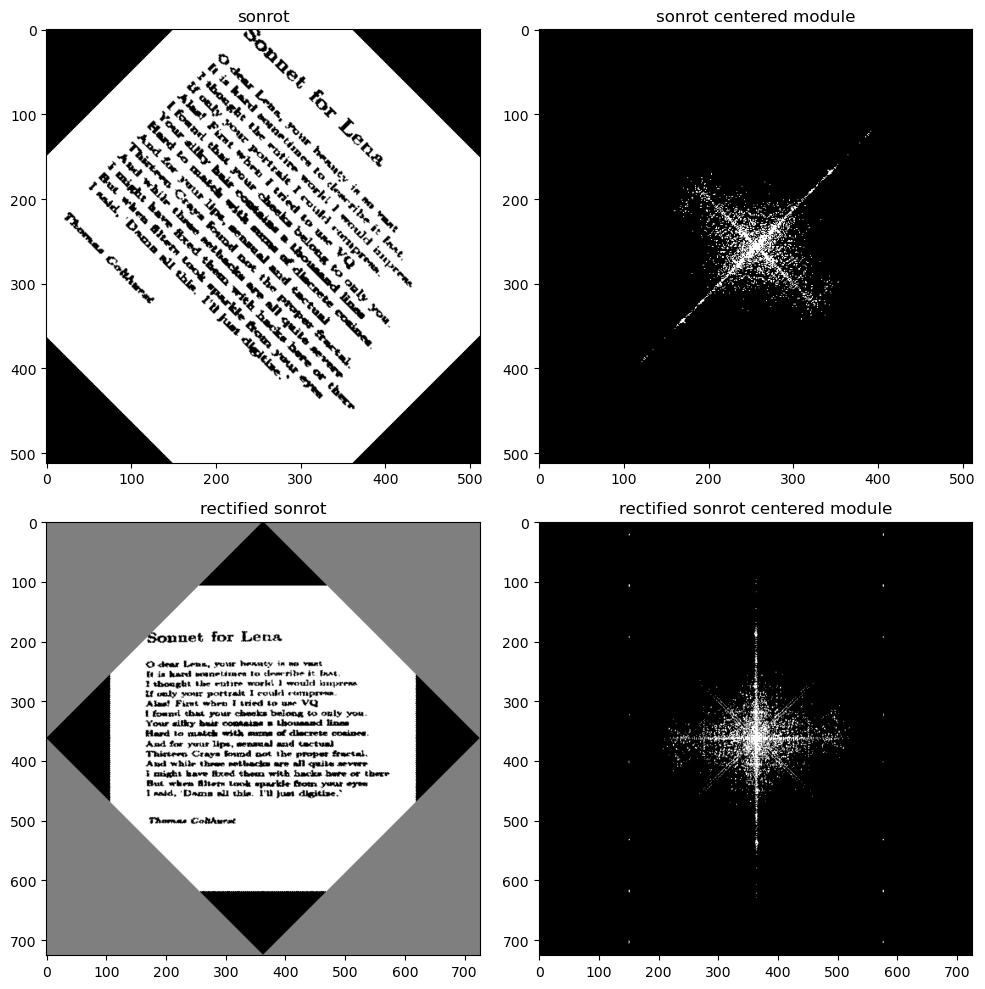

In [ ]:
# ---- parameters
threshold = 1e5
# ---- computation
sonrotRectified, angle = rectifyOrientation(sonrot)
# ---- plotting
print("image has been rectified by %f° " % angle)
plt.subplots(figsize=(10,10))
# ---- sonrot
plt.subplot(2,2,1)
plt.imshow(sonrot, cmap="gray")
plt.title("sonrot")
plt.subplot(2,2,2)
plt.imshow(thresholdImage(sonrotModule, threshold), cmap="gray")
plt.title("sonrot centered module")
# ---- rectified sonrot
plt.subplot(2,2,3)
plt.imshow(sonrotRectified, cmap="gray")
plt.title("rectified sonrot")
plt.subplot(2,2,4)
plt.imshow(thresholdImage(toVisualizeFT(computeFT(sonrotRectified)), threshold), cmap="gray")
plt.title("rectified sonrot centered module")
# ----
plt.tight_layout()
plt.show()

image has been rectified by 45.000000° 


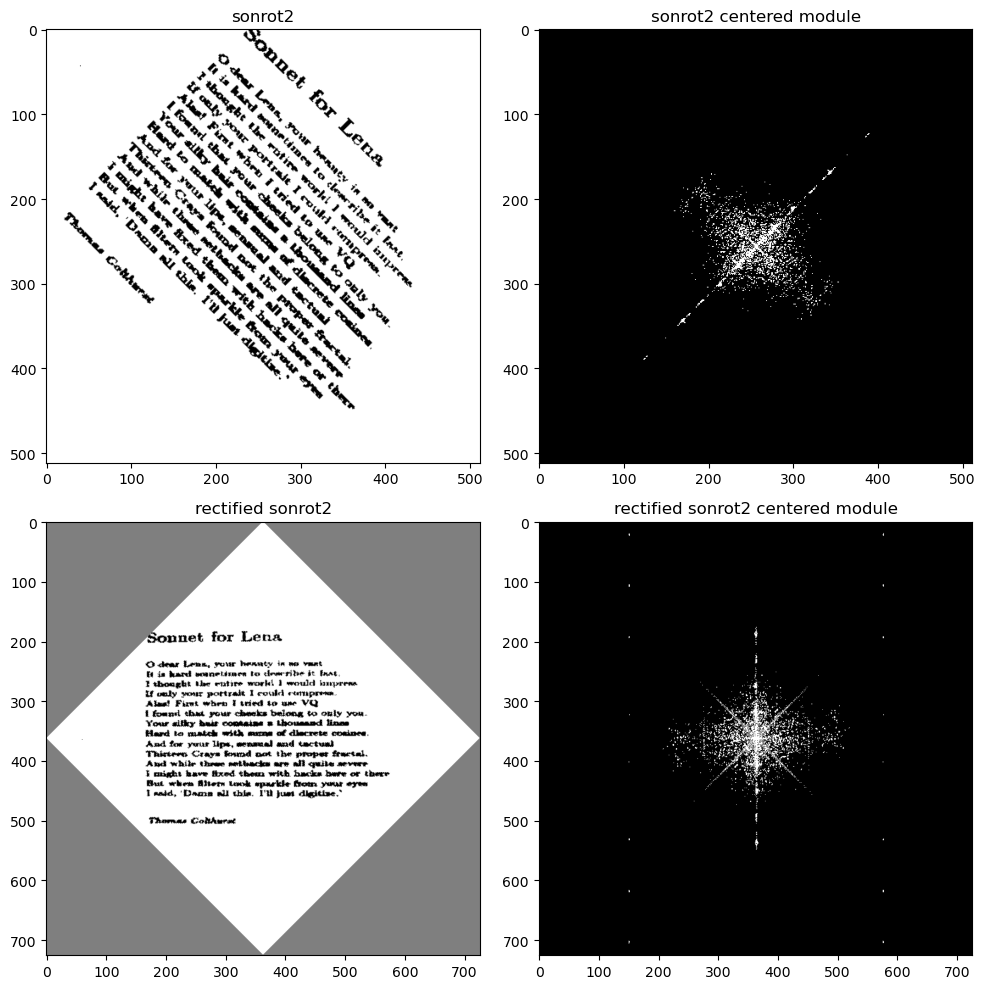

In [ ]:
# ---- parameters
threshold = 1e5
# ---- computation
sonrot2Rectified, angle = rectifyOrientation(sonrot2)
# ---- plotting
print("image has been rectified by %f° " % angle)
plt.subplots(figsize=(10,10))
# ---- sonrot
plt.subplot(2,2,1)
plt.imshow(sonrot2, cmap="gray")
plt.title("sonrot2")
plt.subplot(2,2,2)
plt.imshow(thresholdImage(sonrot2Module, threshold), cmap="gray")
plt.title("sonrot2 centered module")
# ---- rectified sonrot
plt.subplot(2,2,3)
plt.imshow(sonrot2Rectified, cmap="gray")
plt.title("rectified sonrot2")
plt.subplot(2,2,4)
plt.imshow(thresholdImage(toVisualizeFT(computeFT(sonrot2Rectified)), threshold), cmap="gray")
plt.title("rectified sonrot2 centered module")
# ----
plt.tight_layout()
plt.show()

As explained before, we can see that when we rectify our orientation, we lose information in the corners, which is translated on the spectrum, creating a "cross" for both `sonrot` and `sonrot2`. 

Below, we'll test our function on our `son` image, rotated by 90°. The function struggle to find the *real* initial main orientation, giving us a translation of 84.375° instead of 90°. This is due to the fact that when we have a rotation of more than 90°, x-axis and y-axis become inverted. A way to improve our rectification is to increase the number of bins in the `mainOrientation()` function (for example, 32 bins to 64 bins). As we'll have a bigger array, the function will be more precise but it'll result in a degradation of performance. For instance, if we take 64 bins, our rectification angle becomes closer to 90°. However, increasing too much our bins might not work.

Moreover, playing with the threshold doesn't improve the rectification, if the threshold is not too high or too low (otherwise, it'll give us a 45° rotation). 

If we go past 90°, rotation will flip and rectification will always look inverted along the x-axis, due to `mainOrientation()` limitations.

image has been rectified by -84.375000° 
image has been rectified by -84.375000°, t=1e4 
image has been rectified by -84.375000°, t=1e6 
image has been rectified by 87.187500°, bins=64


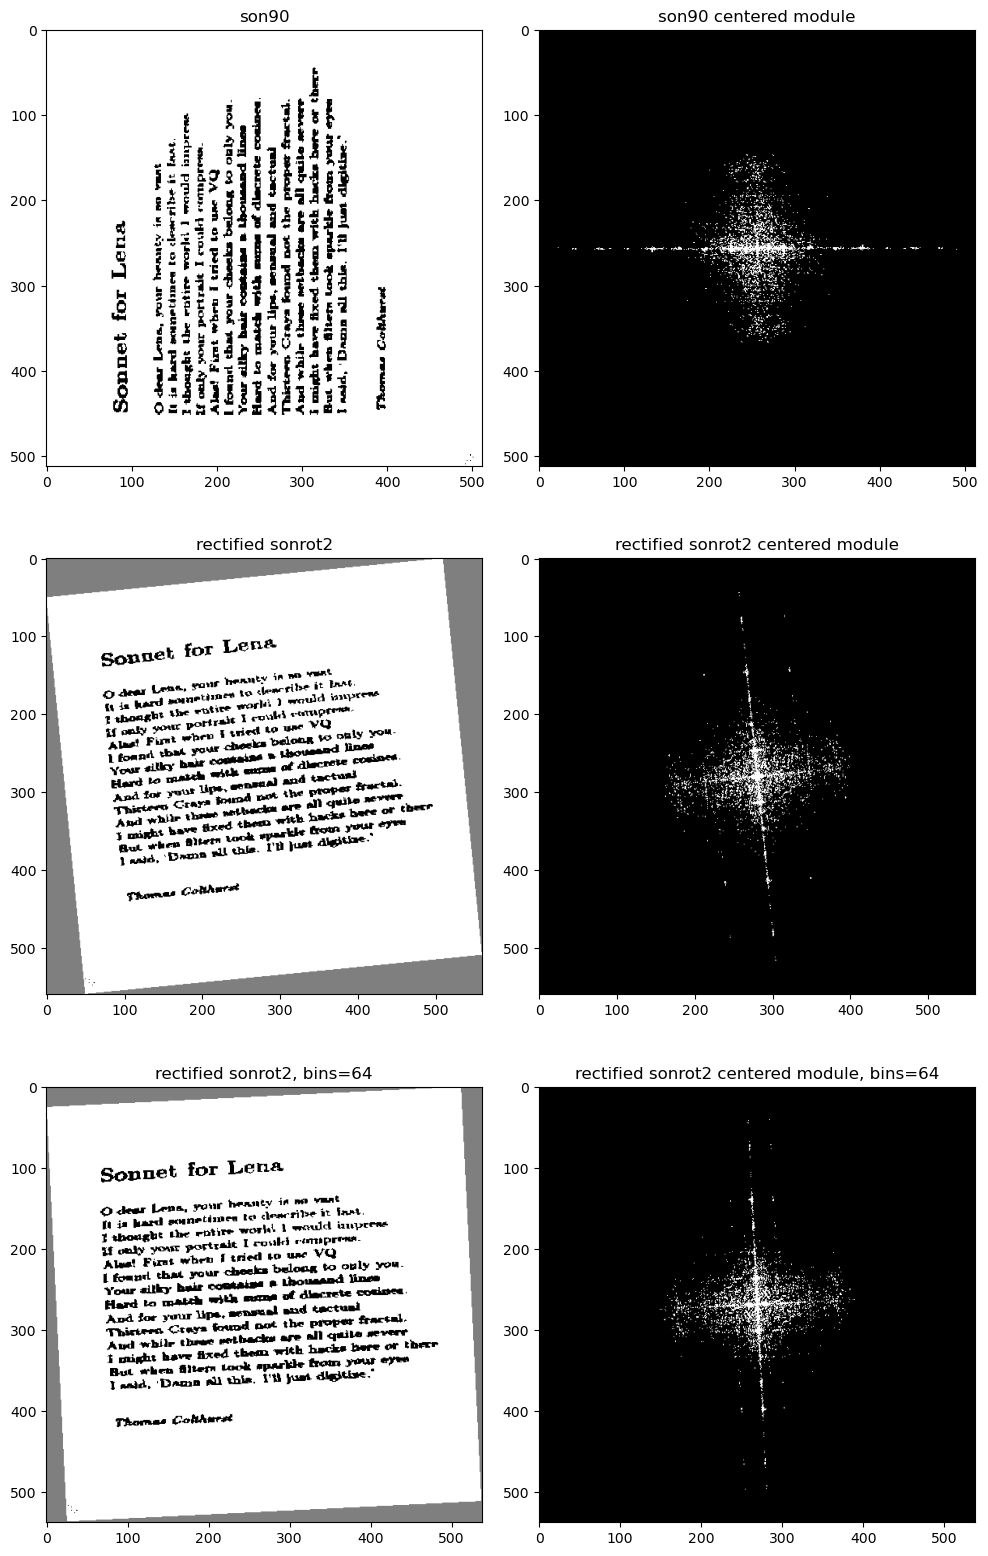

In [ ]:
# ---- parameters
threshold = 1e5
# ---- computation
son90 = rotateImage(son, 90)
son90Rectified, angle = rectifyOrientation(son90)
son90RectifiedPrecise, anglePrecise = rectifyOrientationPrecise(son90,bins=64)
# ---- plotting
print("image has been rectified by %f° " % angle)
print("image has been rectified by %f°, t=1e4 " % rectifyOrientation(son90, 1e4)[1])
print("image has been rectified by %f°, t=1e6 " % rectifyOrientation(son90, 1e6)[1])
print("image has been rectified by %f°, bins=64" % anglePrecise)
plt.subplots(figsize=(10,16))
# ---- sonrot
plt.subplot(3,2,1)
plt.imshow(son90, cmap="gray")
plt.title("son90")
plt.subplot(3,2,2)
plt.imshow(thresholdImage(toVisualizeFT(computeFT(son90)), threshold), cmap="gray")
plt.title("son90 centered module")
# ---- rectified sonrot
plt.subplot(3,2,3)
plt.imshow(son90Rectified, cmap="gray")
plt.title("rectified sonrot2")
plt.subplot(3,2,4)
plt.imshow(thresholdImage(toVisualizeFT(computeFT(son90Rectified)), threshold), cmap="gray")
plt.title("rectified sonrot2 centered module")
# ---- rectified sonrot, bins=64
plt.subplot(3,2,5)
plt.imshow(son90RectifiedPrecise, cmap="gray")
plt.title("rectified sonrot2, bins=64")
plt.subplot(3,2,6)
plt.imshow(thresholdImage(toVisualizeFT(computeFT(son90RectifiedPrecise)), threshold), cmap="gray")
plt.title("rectified sonrot2 centered module, bins=64")
# ----
plt.tight_layout()
plt.show()

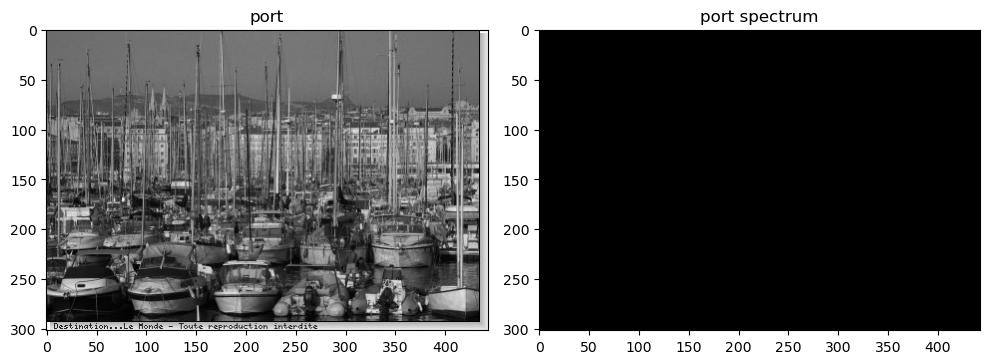

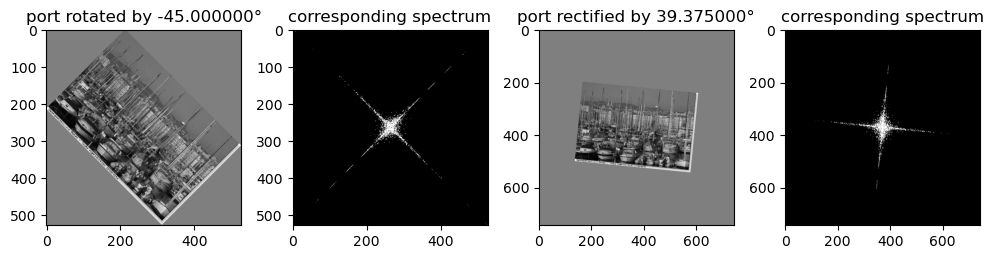

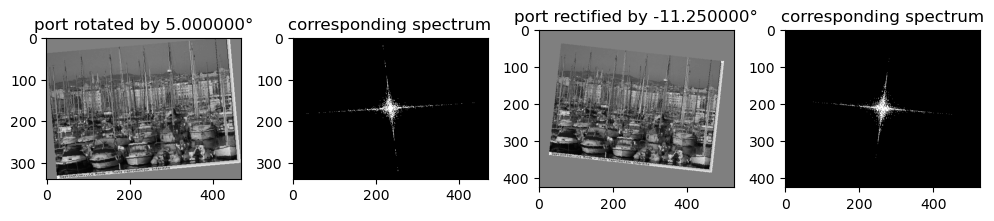

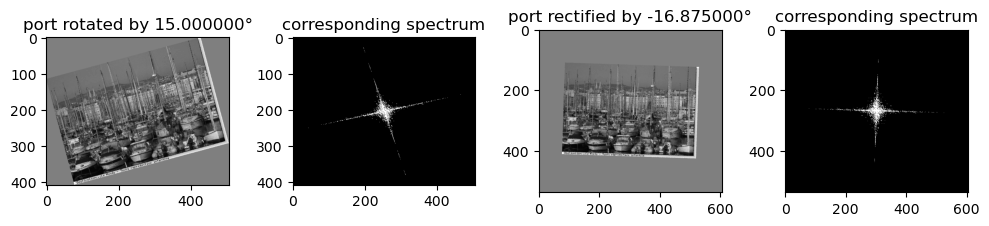

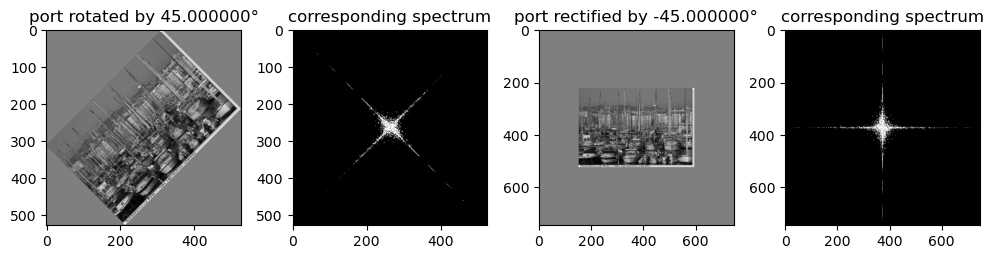

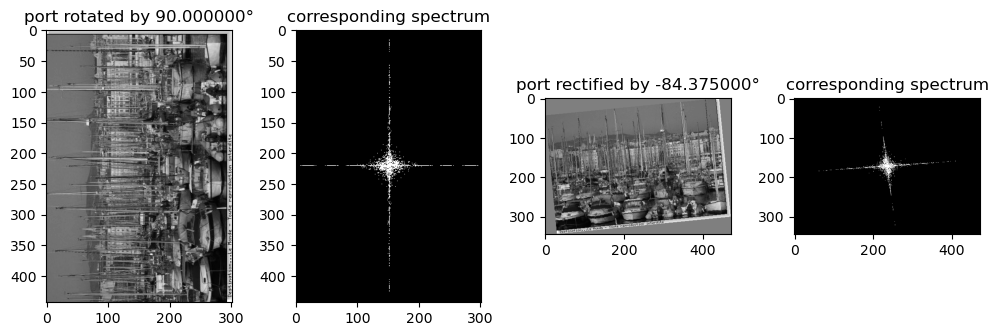

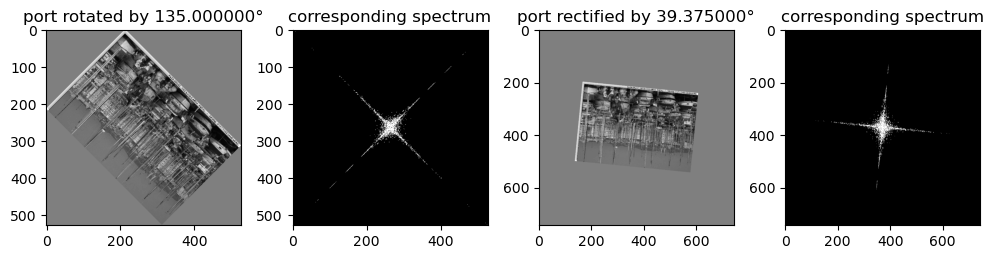

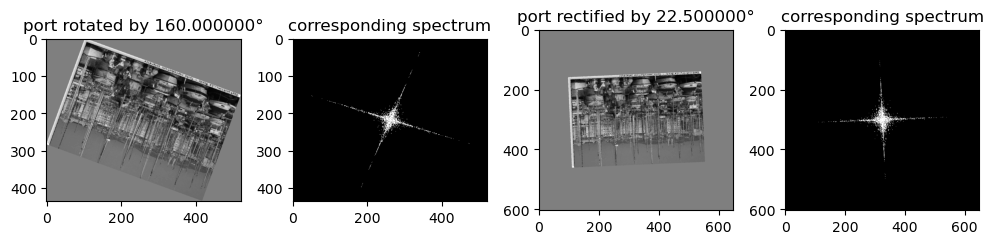

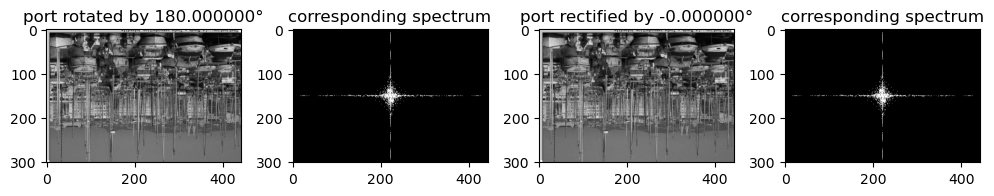

In [ ]:
# ---- parameters
threshold = 11
port = np.array(Image.open("img/port.jpg"))
# ---- computation
angles = [-45, 5, 15, 45, 90, 135, 160, 180]
# ---- plot original image
plt.subplots(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(port, cmap="gray")
plt.title("port")
plt.subplot(1,2,2)
plt.imshow(thresholdImage(toVisualizeFT(computeFT(port)), threshold), cmap="gray")
plt.title("port spectrum")
plt.tight_layout()
plt.show()
# ---- plot rotated images
for theta in angles:
    portRotated = rotateImage(port, theta)
    portRectified, angleRectified = rectifyOrientation(portRotated)
    plt.subplots(figsize=(10, 10))
    plt.subplot(1,4,1)
    plt.imshow(portRotated, cmap="gray")
    plt.title("port rotated by %f°" % theta)
    plt.subplot(1,4,2)
    plt.imshow(thresholdImage(toVisualizeLogFT(computeFT(portRotated)), threshold), cmap="gray")
    plt.title("corresponding spectrum")
    plt.subplot(1,4,3)
    plt.imshow(portRectified, cmap="gray")
    plt.title("port rectified by %f°" % angleRectified)
    plt.subplot(1,4,4)
    plt.imshow(thresholdImage(toVisualizeLogFT(computeFT(portRectified)), threshold), cmap="gray")
    plt.title("corresponding spectrum")
    plt.tight_layout()
    plt.show()